In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [31]:
def mouth_extractor(file_path: str, scale_factor=1.3, min_neighbors=5, mouth_size=(140, 70)) -> None:
    """
    Extract the mouth from the video and save as an npy file
    :param file_path: Path to the video file
    :param scale_factor: Parameter specifying how much the image size is reduced at each image scale
    :param min_neighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it
    :param mouth_size: Size of the extracted mouth region
    :return: None
    """
    base_path = file_path.split('.')[0]
    # if not os.path.exists(base_path + '.npy'):
    if file_path.endswith('.mpg'):
        cap = cv2.VideoCapture(file_path)
        if not cap.isOpened():
            raise Exception("Error: Could not open video.")

        frames = []
        for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
            ret, frame = cap.read()
            if not ret:
                raise Exception("Error: Could not read frame.")
            # 参数分别为低阈值和高阈值
            faces = face_cascade.detectMultiScale(frame, scale_factor, min_neighbors)
            for (x, y, w, h) in faces:
                mouth_roi = frame[y + int(h / 2):y + h, x:x + w, :]

                mouth_roi = cv2.resize(mouth_roi, mouth_size)
                frames.append(mouth_roi)

        cap.release()

        # Normalize frames
        frames_tensor = np.array(frames)
        mean = np.mean(frames_tensor)
        std = np.std(frames)
        frames_tensor = (frames - mean) / std
        # frames_tensor = np.expand_dims(frames_tensor, axis=-1)
        # Save as npy file

        np.save(base_path + '.npy', frames_tensor)
        return frames_tensor
    else:
        raise Exception("Error: File format not supported.")

(75, 70, 140, 3)
[[[116 127 175]
  [ 97 106 154]
  [ 85  95 142]
  ...
  [188 154  32]
  [188 154  32]
  [193 157  28]]

 [[116 127 175]
  [ 97 106 154]
  [ 84  94 141]
  ...
  [188 154  32]
  [188 154  32]
  [193 157  28]]

 [[109 119 186]
  [ 92  99 160]
  [ 81  88 147]
  ...
  [190 154  32]
  [190 154  32]
  [195 155  28]]

 ...

 [[218 172  45]
  [217 169  47]
  [217 169  47]
  ...
  [182 146  31]
  [182 146  31]
  [182 146  31]]

 [[218 172  45]
  [217 169  47]
  [217 169  47]
  ...
  [182 146  31]
  [182 146  31]
  [182 146  31]]

 [[218 172  45]
  [216 168  46]
  [216 168  46]
  ...
  [181 145  30]
  [181 145  30]
  [181 145  30]]]


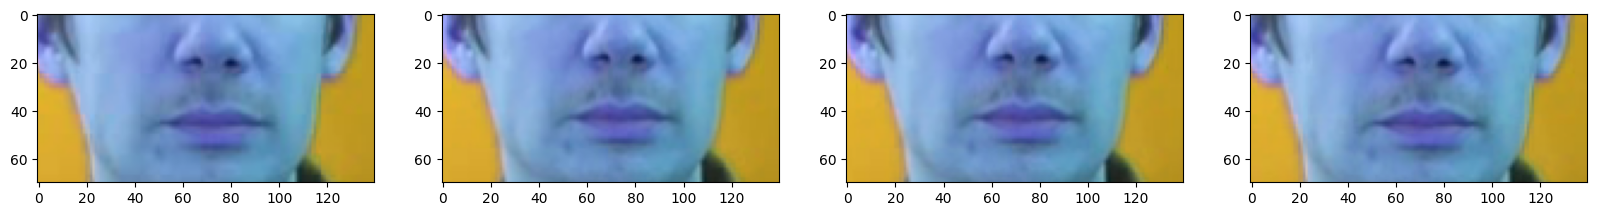

In [6]:
frames_tensor = mouth_extractor('/Users/zhenyili/research project/src/lipNet/data/s1/bbbmzn.mpg')
print(frames_tensor.shape)
# show the first 10 frames the np shape is (75, 1, 70, 140)
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
print(frames_tensor[0])
for i in range(4):
    ax[i].imshow(frames_tensor[i])
    # ax[i].axis('off')  # no axes for this plot





(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(288, 360)
(75, 70, 140, 3)
(288, 360)
[[[0.         0.         0.55649094]
  [0.         0.         0.14956384]
  [0.         0.         0.        ]
  ...
  [0.80839819 0.14956384 0.   

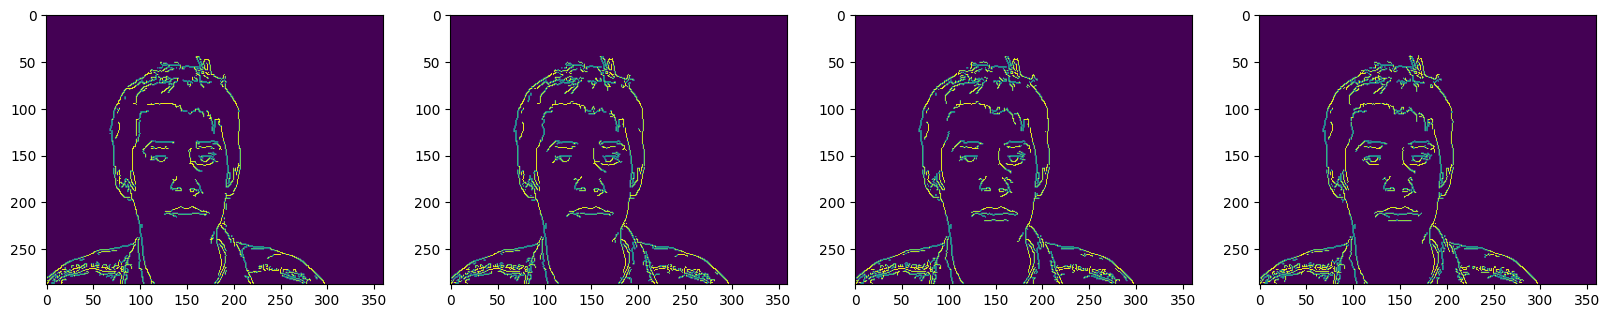

In [34]:
frames_tensor = mouth_extractor('/Users/zhenyili/research project/src/lipNet/data/s1/bbbmzn.mpg')
print(frames_tensor.shape)
# show the first 10 frames the np shape is (75, 1, 70, 140)
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
frames_tensor = np.clip(frames_tensor, 0, 1)
print(frames_tensor[0])
for i in range(4):
    ax[i].imshow(frames_tensor[i])
    # ax[i].axis('off')  # no axes for this plot



TypeError: Invalid shape (70, 140, 3, 1) for image data

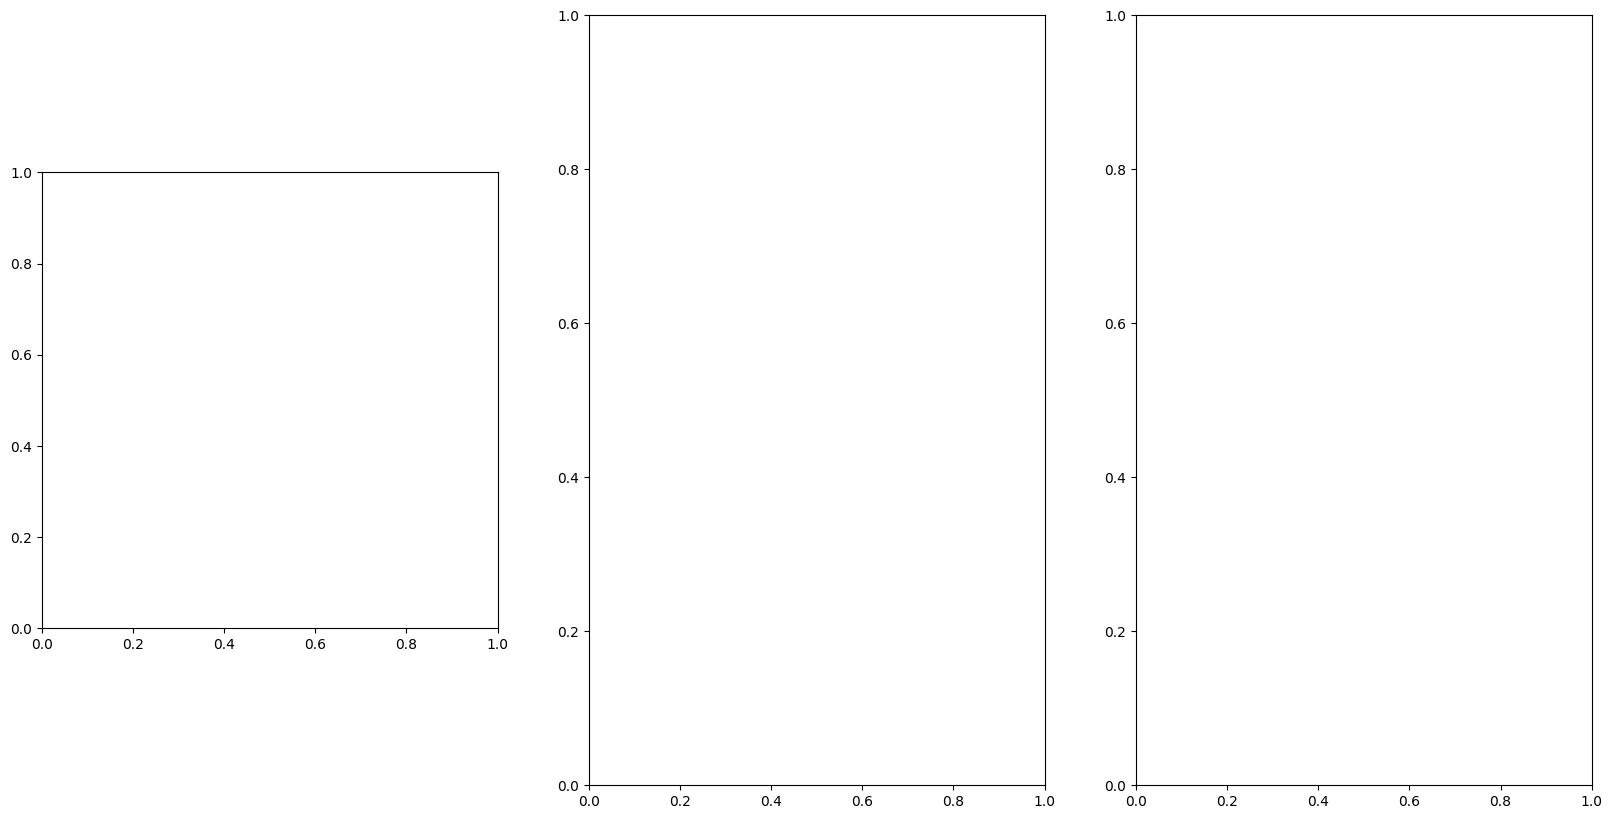

In [9]:
frames_tensor = mouth_extractor('../data/s1/bbbmzn.mpg')
# show the first 10 frames
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for i in range(3):
    ax[i].imshow(frames_tensor[i], )
    ax[i].axis('off')  # no axes for this plot
plt.show()

In [64]:
np.load('/Users/zhenyili/research project/src/lipNet/data/s1/bbbmzn.npy').shape

(75, 70, 140, 1)

In [146]:
np.load('/home/liazylee/jobs/python/AI/lip_reading/src/lipNet/data/s1/bbbmzn.npy').shape

(75, 1, 70, 140)

In [65]:
import logging
import os
import glob
from typing import List, Tuple
import numpy as np
import torch


def load_data(dir) -> List[Tuple[torch.Tensor, torch.Tensor]]:
    data = []
    # 递归搜索该目录下的文件含有align的文件
    alignments = glob.glob(dir + '/**/*.align', recursive=True)
    alignments_dict = {}
    for align in alignments:
        alignments_dict[align.split('/')[-1].split('.')[0]] = load_alignments(align)
    for root, dir, files in os.walk(dir):
        for file in files:
            if file.endswith('.npy'):
                video_frames = np.load(os.path.join(root, file))
                video_frames = torch.from_numpy(video_frames).float()
                filename = file.split('.')[0]
                if filename in alignments_dict:
                    alignments = alignments_dict[filename]
                else:
                    logging.warning(f'No alignment found for {filename}')
                    alignments = ''
                data.append((video_frames, alignments))
    return data


def load_alignments(path: str) -> torch.Tensor:
    with open(path, 'r') as f:
        lines = f.readlines()
        tokens = ''
        for line in lines:
            line = line.split()
            if line[2] != 'sil':
                tokens = tokens + ' ' + line[2]
        tokens_np = np.array([ord(c) for c in tokens])
        tokens_tensor = torch.from_numpy(tokens_np).float()
        return tokens_tensor

In [33]:
data = load_data('/home/liazylee/jobs/python/AI/lip_reading/src/lipNet/data/')
print(data[0][0].shape)

IndexError: list index out of range

In [101]:
print(data[0][1].shape)

torch.Size([22])


In [66]:
def pretain(dir: str) -> List:
    """
    find all the video and extra the mouth region 
    :param dir: 
    :return: 
    """
    video_list = glob.glob(dir + '/**/*.mpg', recursive=True)
    return video_list


In [10]:
video_list = pretain('/home/liazylee/jobs/python/AI/lip_reading/src/lipNet/data')


In [67]:
video_list = pretain('/Users/zhenyili/research project/src/lipNet/data')

In [68]:
print(video_list[:10])

['/Users/zhenyili/research project/src/lipNet/data/s1/prwq3s.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/pbib8p.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/lrae3s.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/pgid6p.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/pbao8n.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/prbx3s.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/lbbk6p.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/bgwu6n.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/sbig6p.mpg', '/Users/zhenyili/research project/src/lipNet/data/s1/pgby5s.mpg']


In [69]:

for i in range(10):
    mouth_extractor(video_list[i])


In [99]:
from src.lipNet.pytorch_lipNet.config import DIR
from src.lipNet.pytorch_lipNet.dataset import LRNetDataset
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Subset
from typing import Any, Tuple


def load_train_test_data() -> list[Subset[Any]]:
    video_dataset = LRNetDataset(DIR)
    train_size = int(0.8 * len(video_dataset))
    test_size = len(video_dataset) - train_size
    return torch.utils.data.random_split(video_dataset, [train_size, test_size])


def collate_fn(batch: list[Tuple[torch.Tensor, torch.Tensor]]) -> Tuple[torch.Tensor, torch.Tensor]:
    inputs_tensors, targets_tensors = zip(*batch)
    padded_inputs = pad_sequence(inputs_tensors, batch_first=True, padding_value=0)
    padded_inputs = padded_inputs.permute(0, 4, 1, 2, 3)
    padded_targets = pad_sequence(targets_tensors, batch_first=True, padding_value=0)
    return padded_inputs, padded_targets,


In [100]:
from torch.utils.data import DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_dataset, val_dataset = load_train_test_data()
train_loader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=32, shuffle=True)

the total alignments files is 1000


In [101]:
sample_inputs, *args = next(iter(train_loader))


In [102]:
sample_inputs, _ = next(iter(train_loader))
print(sample_inputs.shape)
print(_.shape)

torch.Size([8, 1, 75, 70, 140])
torch.Size([8, 29])


In [103]:
input_shape = sample_inputs.shape

print(input_shape)
print(list(map(lambda x: x.shape, args)))

torch.Size([8, 1, 75, 70, 140])
[torch.Size([8, 29])]


In [104]:
input_channels = input_shape[1]
print(input_channels)

1


In [105]:
from model import LRModel
from torch import nn, optim

model = LRModel().to(device)
criterion = nn.CTCLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_loss_curve, val_loss_curve, train_wer_curve, val_wer_curve = [], [], [], []

In [107]:


from tqdm import tqdm

for epoch in tqdm(range(10)):
    train_loss = 0
    val_loss = 0
    train_wer = 0
    val_wer = 0
    print(f'Epoch {epoch + 1}/{10}')
    for i, (inputs, targets) in enumerate(train_loader):
        # #[32, 75, 1, 70, 140]->[32,1,75,70,140]
        # inputs = torch.permute(inputs, (0, 2, 1, 3, 4))
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        input_lengths = torch.full(size=(outputs.size(1),), fill_value=outputs.size(0), dtype=torch.long)
        target_lengths = torch.full(size=(targets.size(0),), fill_value=targets.size(1), dtype=torch.long)
        loss = criterion(outputs, targets, input_lengths, target_lengths)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if i % 10 == 0:
            print(f'Epoch {epoch + 1}/{10}, Step {i}/{len(train_loader)}, Loss: {loss.item():.4f}')
    train_loss /= len(train_loader)
    train_loss_curve.append(train_loss)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10


  0%|          | 0/10 [00:58<?, ?it/s]


KeyboardInterrupt: 